In [40]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [41]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
x_train[0].shape

(32, 32, 3)

In [44]:
import matplotlib.pyplot as plt

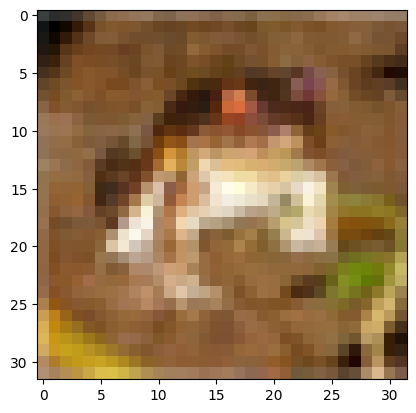

In [45]:
# FROG
plt.imshow(x_train[0])

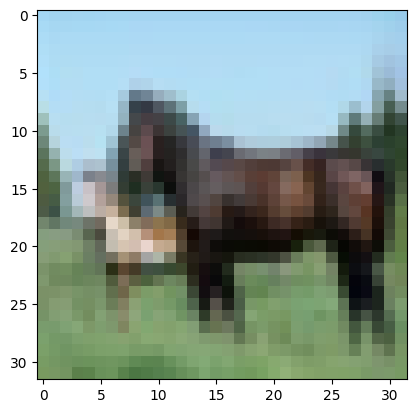

In [46]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [47]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [48]:
x_train[0].shape

(32, 32, 3)

In [49]:
x_train.max()

255

In [50]:
x_train = x_train/255

In [51]:
x_test = x_test/255

In [52]:
x_train.shape

(50000, 32, 32, 3)

In [53]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
y_train.shape

(50000, 1)

In [56]:
y_train[0]

array([6], dtype=uint8)

In [57]:
y_cat_train = to_categorical(y_train,10)

In [58]:
y_cat_train.shape

(50000, 10)

In [59]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [60]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [62]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [66]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 73s 30ms/step - loss: 1.5556 - accuracy: 0.4428 - val_loss: 1.2874 - val_accuracy: 0.5420
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1787 - accuracy: 0.5843 - val_loss: 1.1698 - val_accuracy: 0.5951
Epoch 3/15
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0186 - accuracy: 0.6448 - val_loss: 1.0760 - val_accuracy: 0.6193
Epoch 4/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9118 - accuracy: 0.6847 - val_loss: 1.0264 - val_accuracy: 0.6456
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8271 - accuracy: 0.7155 - val_loss: 0.9742 - val_accuracy: 0.6721
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7580 - accuracy: 0.7406 - val_loss: 1.0396 - val_accuracy: 0.6706
Epoch 7/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6934 - accuracy: 0.7622 - val_loss: 1.0639 -

In [67]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [68]:
losses = pd.DataFrame(model.history.history)

In [69]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.555641,0.44276,1.287396,0.5420
1,1.178725,0.58426,1.169805,0.5951
2,1.018608,0.64476,1.075978,0.6193
3,0.911773,0.68466,1.026391,0.6456
4,0.827071,0.71548,0.974225,0.6721


<Axes: >

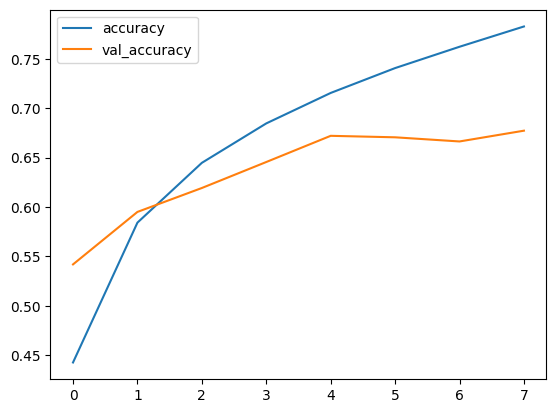

In [70]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

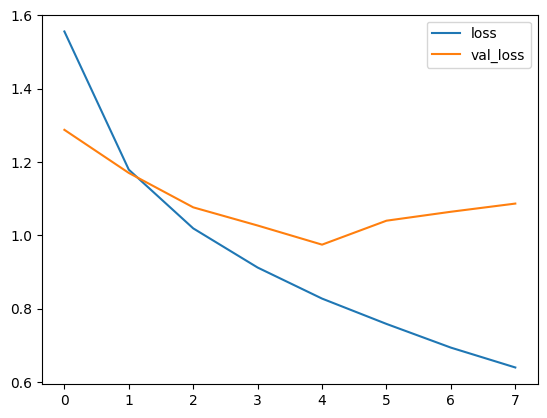

In [71]:
losses[['loss','val_loss']].plot()

In [72]:
model.metrics_names

['loss', 'accuracy']

In [73]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0862380266189575, 0.677299976348877]


In [75]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=1)

313/313 [==============================] - 12s 14ms/step


In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.73      0.84      0.78      1000
           2       0.76      0.43      0.55      1000
           3       0.58      0.40      0.47      1000
           4       0.63      0.60      0.61      1000
           5       0.53      0.67      0.59      1000
           6       0.68      0.81      0.74      1000
           7       0.73      0.72      0.73      1000
           8       0.77      0.78      0.77      1000
           9       0.69      0.80      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [77]:
confusion_matrix(y_test,predictions)

array([[729,  46,  17,   7,  19,  18,   9,  10,  92,  53],
       [  9, 838,   2,   4,   3,   7,  11,   3,  17, 106],
       [ 96,  19, 430,  36, 110, 102, 114,  44,  26,  23],
       [ 23,  31,  30, 397,  70, 251,  92,  40,  29,  37],
       [ 33,  11,  32,  53, 597,  69,  86,  85,  22,  12],
       [ 15,  14,  15, 109,  48, 668,  39,  56,  13,  23],
       [ 11,  17,  16,  42,  25,  38, 814,  10,   9,  18],
       [ 27,   8,  12,  30,  61,  86,  10, 721,   4,  41],
       [ 79,  58,   9,   2,   9,   8,  11,   3, 780,  41],
       [ 20, 105,   4,   6,   2,  16,   8,  13,  27, 799]], dtype=int64)

<Axes: >

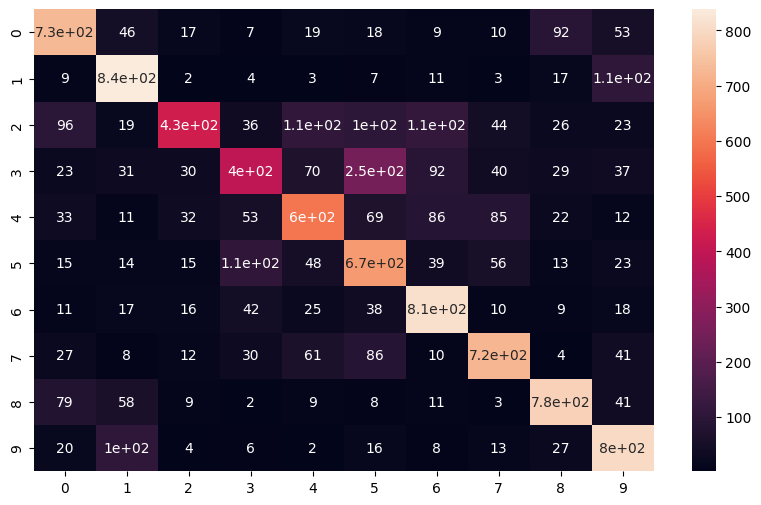

In [78]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [79]:
my_image = x_test[16]

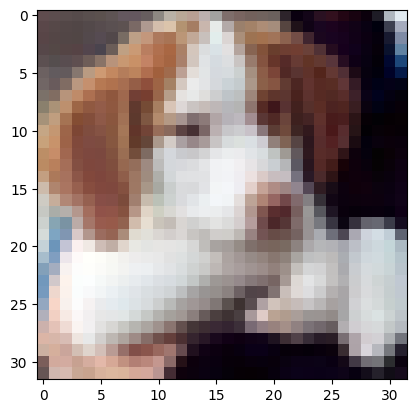

In [80]:
plt.imshow(my_image)

In [82]:
# SHAPE --> (num_images,width,height,color_channels)
pred = model.predict(my_image.reshape(1,32,32,3))
pred = np.argmax(pred,axis=1)
pred

1/1 [==============================] - 0s 208ms/step


array([5], dtype=int64)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html